**데이터 불러오기**

**pycaret install하기**

In [1]:
# !pip install datawig
# !pip install pycaret[full] 

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_train = pd.read_csv('train.csv')#/content/drive/MyDrive/airport/
data_test = pd.read_csv('test.csv')#/content/drive/MyDrive/airport/

**범주형 데이터와 이산형 데이터를 분할**

In [4]:
numeric_feature = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
ordinal_feature = ['Seat comfort',   'Gate location',                    # 'Departure/Arrival time convenient', 'Food and drink',
           'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 
           'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']
categorical_feature = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [5]:
data_train.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
target                               0
dtype: int64

**결측치 보기**

In [6]:
# print("Train data missing value")
# for feature in ordinal_feature:
#     if len(data_train[data_train[feature] == 0]) > 0:
#         print(feature, len(data_train[data_train[feature] == 0]))

# print("=======================")
        
# print("Test data missing value")
# for feature in ordinal_feature:
#     if len(data_test[data_test[feature] == 0]) > 0:
#         print(feature, len(data_test[data_test[feature] == 0]))

**cat_plot함수를 만들어서 그래프 그리고 값에 대해 해석하기**

In [7]:
# train_0 = data_train[data_train['target']==0]
# train_1 = data_train[data_train['target']==1]

# def cat_plot(column):
#     f, ax = plt.subplots(1, 3, figsize=(16, 6))
#     sns.countplot(x = column,
#                 data = data_train,
#                 ax = ax[0],
#                 order = data_train[column].value_counts().index)
#     ax[0].tick_params(labelsize=12)
#     ax[0].set_title('Full train data')
#     ax[0].set_ylabel('count')
#     ax[0].tick_params(rotation=50)


#     sns.countplot(x = column,
#                 data = train_1,
#                 ax = ax[1],
#                 order = train_1[column].value_counts().index)
#     ax[1].tick_params(labelsize=12)
#     ax[1].set_title('target = 1')
#     ax[1].set_ylabel('count')
#     ax[1].tick_params(rotation=50)

#     sns.countplot(x = column,
#                 data = train_0,
#                 ax = ax[2],
#                 order = train_0[column].value_counts().index)
#     ax[2].tick_params(labelsize=12)
#     ax[2].set_title('target = 0')
#     ax[2].set_ylabel('count')
#     ax[2].tick_params(rotation=50)

#     plt.subplots_adjust(wspace=0.3, hspace=0.3)
#     plt.show()
# train = pd.get_dummies(data_train)
# test = pd.get_dummies(data_test)
# for i in ordinal_feature:
#     cat_plot(i)

**seat comfort가 0일 때 target이 항상 1이였기 때문에 다른 요인이 무엇인지 분석하기 위한 출력**

In [8]:
# data_train[data_train["Seat comfort"]==0]


**결측치 처리**

In [9]:
# #우선 train data에만 Ease of Online Booking과 Online boarding의 결측치가 1개 있기 때문에 
# #이 부분은 train data만 간단하게 수정해줍니다.
# data_train["Ease of Online booking"][data_train["Ease of Online booking"] == 0] = 3
# data_train["Online boarding"][data_train["Online boarding"] == 0] = 3

# #Seat comfort에서 0인 사람들은 모두가 타겟이 1 이었기 때문에 0은 Seat comfort에서 5로 정해도 될 것이라고 판단함.
# data_train['Seat comfort'][data_train['Seat comfort'] == 0] = 5
# data_test['Seat comfort'][data_test['Seat comfort'] == 0] = 5

# # 1,2 항목 병합 필요한 변수들
# data_train['Inflight entertainment'][data_train['Inflight entertainment'] == 1] = 2
# data_test['Inflight entertainment'][data_test['Inflight entertainment'] == 1] = 2

# data_train['Checkin service'][data_train['Checkin service'] == 1] = 2
# data_test['Checkin service'][data_test['Checkin service'] == 1] = 2

# data_train['Cleanliness'][data_train['Cleanliness'] == 1] = 2
# data_test['Cleanliness'][data_test['Cleanliness'] == 1] = 2


# # 2,3 항목 변환 필요한 변수들
# data_train['Leg room service'][data_train['Leg room service'] == 2] = 3
# data_test['Leg room service'][data_test['Leg room service'] == 2] = 3

# data_train['Baggage handling'][data_train['Baggage handling'] == 2] = 3
# data_train['Baggage handling'][data_train['Baggage handling'] == 0] = 4

# data_test['Baggage handling'][data_test['Baggage handling'] == 2] = 3
# data_test['Baggage handling'][data_test['Baggage handling'] == 0] = 4

# # 조금 특별한 변환 필요한 변수들
# data_train['Food and drink'][data_train['Food and drink'] == 1] = -1
# data_train['Food and drink'][data_train['Food and drink'] == 2] = 1
# data_train['Food and drink'][data_train['Food and drink'] == 3] = 2
# data_train['Food and drink'][data_train['Food and drink'] == -1] = 3
# data_train['Food and drink'][data_train['Food and drink'] == 0] = 5

# data_test['Food and drink'][data_test['Food and drink'] == 1] = -1
# data_test['Food and drink'][data_test['Food and drink'] == 2] = 1
# data_test['Food and drink'][data_test['Food and drink'] == 3] = 2
# data_test['Food and drink'][data_test['Food and drink'] == -1] = 3
# data_test['Food and drink'][data_test['Food and drink'] == 0] = 5

In [10]:
# corr_matrix = data_train.corr()
# corr_matrix['Food and drink'].sort_values(ascending=False)

In [11]:
# corr_matrix = data_train.corr()
# corr_matrix['Food and drink'].sort_values(ascending=False)

**결측치 보기**

**train_data와 test_data의 결측치 출력**

In [12]:
# #결측치 보기
# print("Train data missing value")
# for feature in ordinal_feature:
#     if len(data_train[data_train[feature] == 0]) > 0:
#         print(feature, len(data_train[data_train[feature] == 0]))

# print("=======================")
        
# print("Test data missing value")
# for feature in ordinal_feature:
#     if len(data_test[data_test[feature] == 0]) > 0:
#         print(feature, len(data_test[data_test[feature] == 0]))

**로그변환**

**datawig를 통해 대치하기 위해 0값을 np.nan값으로 바꿔준다**

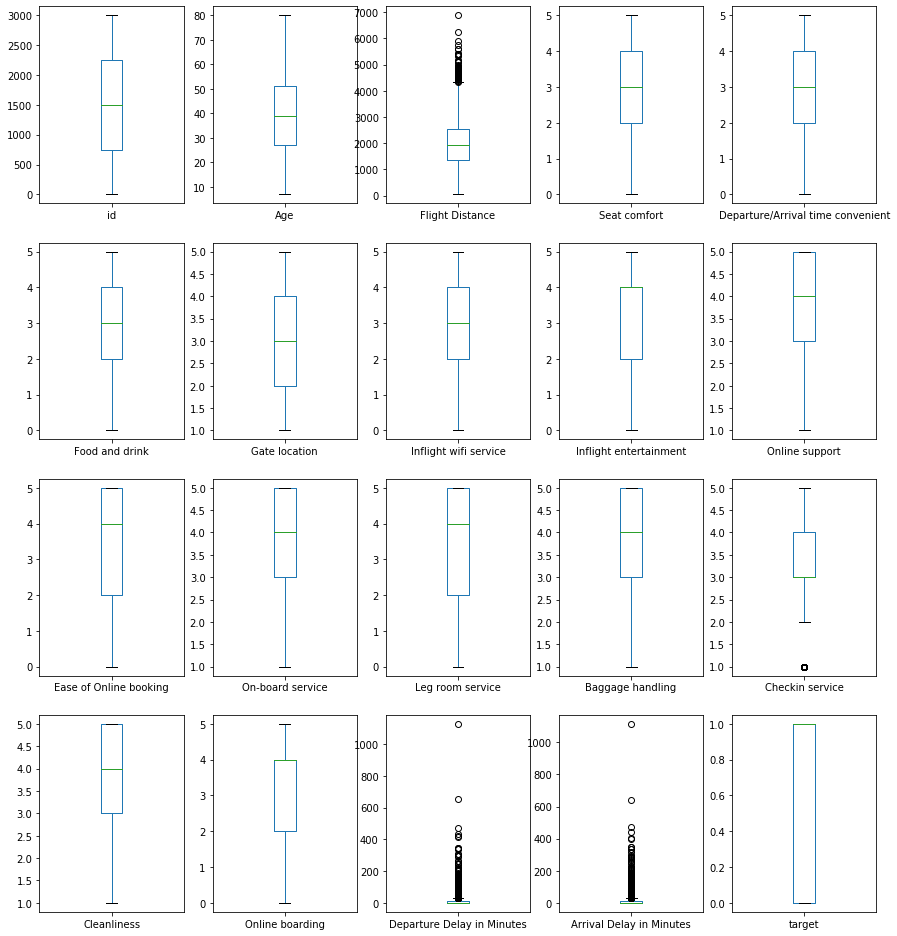

In [13]:
data_train.plot(kind='box', subplots=True, layout=(5, 5), figsize=(15, 21))
plt.show()   

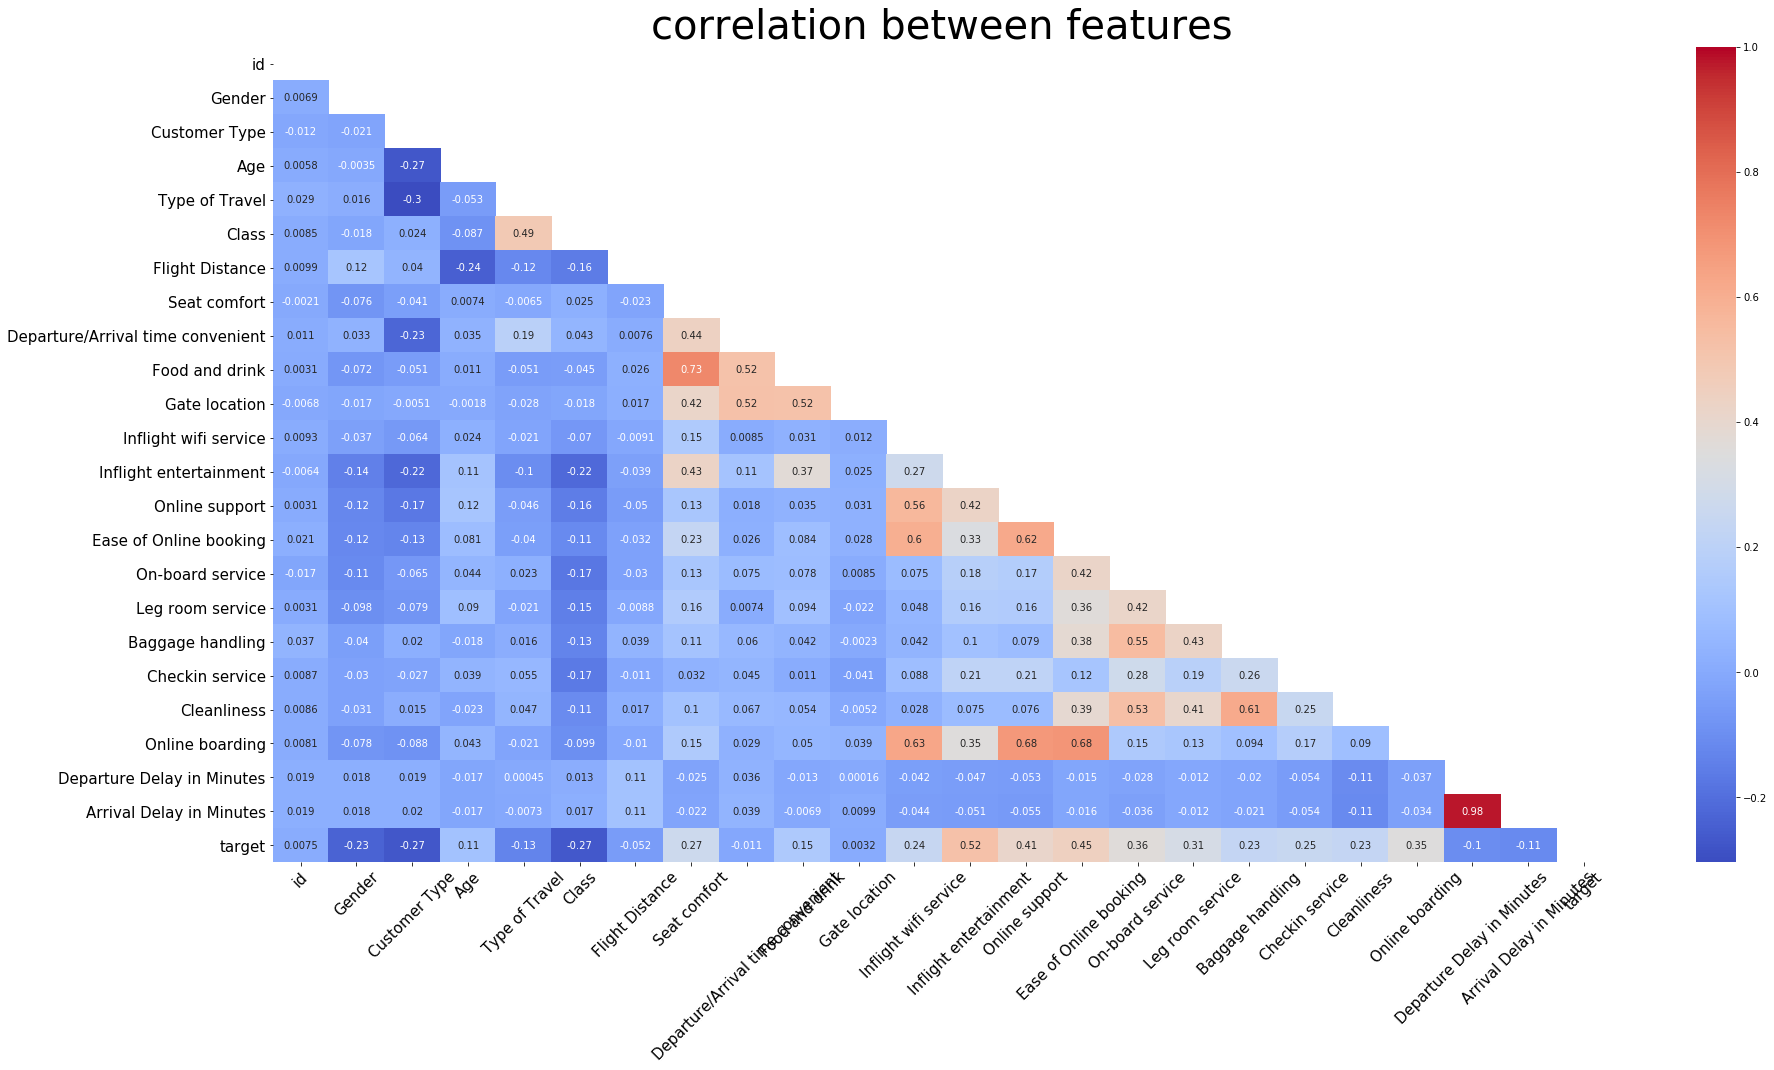

In [14]:
# 상관관계
from sklearn.preprocessing import LabelEncoder

corr_df = data_train.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

plt.figure(figsize=(30,15))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

이상치 제거

In [15]:
data_train['Checkin service'].median()

3.0

In [16]:
def outliers_iqr(data):
    q1, q3 = np.percentile(data, [25, 75])
    # 넘파이의 값을 퍼센트로 표시해주는 함수

    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return np.where((data > upper_bound) | (data < lower_bound))






In [17]:
q1, q3 = np.percentile(data_train['Flight Distance'], [25, 75])
iqr = q3 - q1
upper_bound =q3 + (iqr * 1.5)
#4345.75

for i in range(len(data_train)):
    if data_train.loc[i,'Flight Distance']>=4345.75:
        data_train.loc[i,'Flight Distance_out']=1
    else:
        data_train.loc[i,'Flight Distance_out']=0

for i in range(len(data_test)):
    if data_test.loc[i,'Flight Distance']>=4345.75:
        data_test.loc[i,'Flight Distance_out']=1
    else:
        data_test.loc[i,'Flight Distance_out']=0

In [18]:
data_train['Flight Distance'].median()

1937.0

In [19]:
FlightDistance_index_data = outliers_iqr(data_train['Flight Distance'])[0]
data_train.loc[FlightDistance_index_data, 'Flight Distance'] = data_train['Flight Distance'].median()

GarageArea_index_data = outliers_iqr(data_train['Checkin service'])[0]
data_train.loc[GarageArea_index_data, 'Checkin service'] = 3

In [20]:
#data_train['Flight Distance'][data_train['Flight Distance_out']==1]

In [21]:
# #파생변수 만들기 : distance

# def distace_isout(distance):
#     distance=(distance//1000)*1000
#     return distance

# Distance_category=data_train['Flight Distance'].apply(distace_categlrize)
#data_train['Flight Distance_cat']=Distance_category.astype('category')

# plt.figure(figsize=(12,8))
# sns.countplot(y='Flight Distance_cat', data=data_train)
# plt.show()

In [22]:
# 거리별 만족도 비율

# mean_by_d_cat =pd.DataFrame(data_train['target'].groupby(data_train['Flight Distance_cat']).mean())

# plt.figure(figsize=(12,8))
# mean_by_d_cat.plot.bar(color='red')
# plt.show()

In [23]:
data_train.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'target',
       'Flight Distance_out'],
      dtype='object')

In [24]:
# distance 삭제


In [25]:
# 1차 삭제 : 결측치 많음+id

data_train = data_train.drop([ 'Departure/Arrival time convenient','id','Food and drink'], axis = 1)
data_test = data_test.drop(['Departure/Arrival time convenient', 'id','Food and drink'], axis = 1)

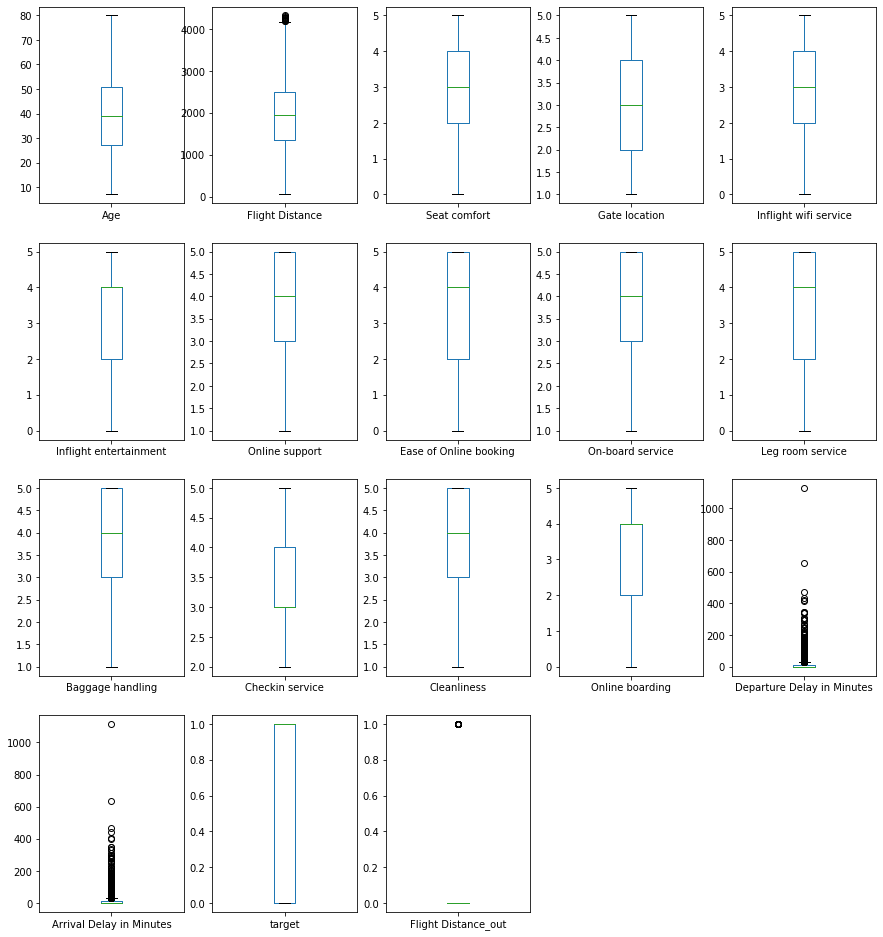

In [26]:
# 이상치 처리를 위한 distance 처리 해줄 것
data_train.plot(kind='box', subplots=True, layout=(5, 5), figsize=(15, 21))
plt.show()   

결측치

In [27]:
#결측치 보기
print("Train data missing value")
for feature in ordinal_feature:
    if len(data_train[data_train[feature] == 0]) > 0:
        print(feature, len(data_train[data_train[feature] == 0]))

print("=======================")
        
print("Test data missing value")
for feature in ordinal_feature:
    if len(data_test[data_test[feature] == 0]) > 0:
        print(feature, len(data_test[data_test[feature] == 0]))

Train data missing value
Seat comfort 106
Inflight wifi service 2
Inflight entertainment 73
Ease of Online booking 1
Leg room service 11
Online boarding 1
Test data missing value
Seat comfort 64
Inflight wifi service 1
Inflight entertainment 39
Leg room service 10



Departure/Arrival time convenient 154 삭제

Food and drink 129 삭제
Seat comfort 106

Inflight entertainment 73


Leg room service 11   wig
Inflight wifi service 2   wig
----------------------------------
Ease of Online booking 1   간단하게 변경
Online boarding 1          간단하게 변경
=======================


Departure/Arrival time convenient 90 삭제

Food and drink 80  삭제
Seat comfort 64
Inflight entertainment 39
Leg room service 10
Inflight wifi service 1

In [28]:
# median 값으로 변경 ->취소
data_train["Ease of Online booking"][data_train["Ease of Online booking"] == 0] = 3  
data_train["Online boarding"][data_train["Online boarding"] == 0] =3

C:\Users\simsewon\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\simsewon\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## 0217 결측치

In [29]:
wig_feature = ['Inflight wifi service', 'Leg room service']

In [30]:
for i in range(len(data_train)):
    for feature in wig_feature:
        if data_train[feature].iloc[i] == 0:
            data_train[feature].iloc[i] = np.nan

for i in range(len(data_test)):
    for feature in wig_feature:
        if data_test[feature].iloc[i] == 0:
            data_test[feature].iloc[i] = np.nan

C:\Users\simsewon\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


**상관관계가 높은 5개 출력**

In [31]:
corr_matrix = data_train.corr()
corr_matrix["Inflight wifi service"].sort_values(ascending=False)[:5]

Inflight wifi service     1.000000
Online boarding           0.630754
Ease of Online booking    0.602117
Online support            0.562900
Inflight entertainment    0.271998
Name: Inflight wifi service, dtype: float64

In [32]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
Gender                        3000 non-null object
Customer Type                 3000 non-null object
Age                           3000 non-null int64
Type of Travel                3000 non-null object
Class                         3000 non-null object
Flight Distance               3000 non-null float64
Seat comfort                  3000 non-null int64
Gate location                 3000 non-null int64
Inflight wifi service         2998 non-null float64
Inflight entertainment        3000 non-null int64
Online support                3000 non-null int64
Ease of Online booking        3000 non-null int64
On-board service              3000 non-null int64
Leg room service              2989 non-null float64
Baggage handling              3000 non-null int64
Checkin service               3000 non-null int64
Cleanliness                   3000 non-null int64
Online boarding               300

In [33]:
# 상관관계가 높은 3개의 feature를 선정하고 datawig를 이용하여 학습시킨뒤 train과 test셋의 결측치를 대치합니다.
import datawig
target_feature = "Inflight wifi service"

imputer = datawig.SimpleImputer(input_columns=['Online boarding', 'Ease of Online booking', 'Online support'],
                                output_column=target_feature)
imputer.fit(train_df=data_train, num_epochs=50)

null_train = data_train[data_train[target_feature].isnull()]
null_imputed = imputer.predict(null_train)
imputed_train = pd.DataFrame(null_imputed)

n = 0
for i in range(len(data_train)):
    if np.isnan(data_train[target_feature].iloc[i]) == True:
        data_train[target_feature].iloc[i] = int(round(imputed_train[target_feature+"_imputed"].iloc[n]))
        n += 1
        
null_train = data_test[data_test[target_feature].isnull()]
null_imputed = imputer.predict(null_train)
imputed_train = pd.DataFrame(null_imputed)

n = 0
for i in range(len(data_test)):
    if np.isnan(data_test[target_feature].iloc[i]) == True:
        data_test[target_feature].iloc[i] = int(round(imputed_train[target_feature+"_imputed"].iloc[n]))
        n += 1

2022-02-18 16:04:16,029 [INFO]  
========== start: fit model
2022-02-18 16:04:16,032 [WARNING]  Already bound, ignoring bind()
2022-02-18 16:04:16,610 [INFO]  Epoch[0] Batch [0-85]	Speed: 2392.35 samples/sec	cross-entropy=10.388260	Inflight wifi service-accuracy=0.000000
2022-02-18 16:04:16,924 [INFO]  Epoch[0] Train-cross-entropy=9.292808
2022-02-18 16:04:16,926 [INFO]  Epoch[0] Train-Inflight wifi service-accuracy=0.000000
2022-02-18 16:04:16,928 [INFO]  Epoch[0] Time cost=0.894
2022-02-18 16:04:16,938 [INFO]  Saved checkpoint to "inflight_wifi_service\model-0000.params"
2022-02-18 16:04:16,967 [INFO]  Epoch[0] Validation-cross-entropy=10.365005
2022-02-18 16:04:16,969 [INFO]  Epoch[0] Validation-Inflight wifi service-accuracy=0.000000
2022-02-18 16:04:17,416 [INFO]  Epoch[1] Batch [0-85]	Speed: 3085.20 samples/sec	cross-entropy=8.679467	Inflight wifi service-accuracy=0.000000
2022-02-18 16:04:17,792 [INFO]  Epoch[1] Train-cross-entropy=8.331298
2022-02-18 16:04:17,794 [INFO]  Epoch[

In [34]:
corr_matrix = data_train.corr()
corr_matrix['Leg room service'].sort_values(ascending=False)[:5]

Leg room service          1.000000
Baggage handling          0.426888
On-board service          0.418194
Cleanliness               0.403671
Ease of Online booking    0.361459
Name: Leg room service, dtype: float64

In [35]:
# 상관관계가 높은 3개의 feature를 선정하고 datawig를 이용하여 학습시킨뒤 train과 test셋의 결측치를 대치합니다.
target_feature = 'Leg room service'

imputer = datawig.SimpleImputer(input_columns=['Baggage handling', 'On-board service', 'Cleanliness'],
                                output_column=target_feature)
imputer.fit(train_df=data_train, num_epochs=50)

null_train = data_train[data_train[target_feature].isnull()]
null_imputed = imputer.predict(null_train)
imputed_train = pd.DataFrame(null_imputed)

n = 0
for i in range(len(data_train)):
    if np.isnan(data_train[target_feature].iloc[i]) == True:
        data_train[target_feature].iloc[i] = int(round(imputed_train[target_feature+"_imputed"].iloc[n]))
        n += 1
        
null_train = data_test[data_test[target_feature].isnull()]
null_imputed = imputer.predict(null_train)
imputed_train = pd.DataFrame(null_imputed)

n = 0
for i in range(len(data_test)):
    if np.isnan(data_test[target_feature].iloc[i]) == True:
        data_test[target_feature].iloc[i] = int(round(imputed_train[target_feature+"_imputed"].iloc[n]))
        n += 1

C:\Users\simsewon\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\simsewon\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [36]:
#결측치 보기
print("Train data missing value")
for feature in ordinal_feature:
    if len(data_train[data_train[feature] == 0]) > 0:
        print(feature, len(data_train[data_train[feature] == 0]))

print("=======================")
        
print("Test data missing value")
for feature in ordinal_feature:
    if len(data_test[data_test[feature] == 0]) > 0:
        print(feature, len(data_test[data_test[feature] == 0]))

Train data missing value
Seat comfort 106
Inflight entertainment 73
Test data missing value
Seat comfort 64
Inflight entertainment 39


**데이터 삭제**

In [37]:
#log 변환 실행

data_train['Departure Delay in Minutes'] = np.log1p(data_train['Departure Delay in Minutes'])
data_train['Arrival Delay in Minutes'] = np.log1p(data_train['Arrival Delay in Minutes'])

#test 데이터에도 변환 실행

data_test['Departure Delay in Minutes'] = np.log1p(data_test['Departure Delay in Minutes'])
data_test['Arrival Delay in Minutes'] = np.log1p(data_test['Arrival Delay in Minutes'])

In [38]:
data_train['Delayed'] = (data_train['Departure Delay in Minutes'] 
                         + data_train['Arrival Delay in Minutes']).apply(lambda x : 0 if x > 0 else 1)
data_test['Delayed'] = (data_test['Departure Delay in Minutes'] 
                         + data_test['Arrival Delay in Minutes']).apply(lambda x : 0 if x > 0 else 1)

In [39]:
# 삭제할 변수 gate location은 데이터 분포가 엉망이라서 삭제
# id - 학습에 관련없음
# Departure Delay in Minutes - Arrival Delay in Minutes과의 다중 공선성과 target과의 낮은 상관계수
# Departure/Arrival time convenient - 많은 결측치 및 target과의 낮은 상관계수
data_train = data_train.drop(['Departure Delay in Minutes' ], axis = 1)
data_test = data_test.drop(['Departure Delay in Minutes'], axis = 1)

In [40]:
# numeric_feature = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
# ordinal_feature = ['Seat comfort', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 
#             'Leg room service', 'Checkin service', 'Cleanliness', 'Online boarding']
# categorical_feature = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

**타겟과의 관련성**

In [41]:
# data_train["Online boarding"][data_train["Online boarding"] == 0] = 3

In [42]:
# # corr_matrix = data_train.corr()
# # corr_matrix["target"].sort_values(ascending=False)
# import xgboost

In [43]:
# xgboost = create_model('xgboost')

In [44]:
from pycaret.classification import *
clf1 = setup(data = data_train,
             silent = True,
             target = 'target',
             session_id = 20201809,
             n_jobs = 7
             

             )

,Description,Value
0,session_id,20201809
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3000, 22)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


In [45]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [46]:
best = compare_models(n_select=4, fold = 10) #상위 모델 4개를 선택합니다
best

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9333,0.9809,0.947,0.9365,0.9415,0.8639,0.8645,2.029
xgboost,Extreme Gradient Boosting,0.9262,0.981,0.9403,0.9306,0.9352,0.8494,0.85,4.77
et,Extra Trees Classifier,0.9257,0.9747,0.9386,0.9312,0.9347,0.8484,0.8489,0.277
lightgbm,Light Gradient Boosting Machine,0.9257,0.9806,0.9445,0.9265,0.9351,0.8481,0.849,6.318
gbc,Gradient Boosting Classifier,0.9219,0.9746,0.9352,0.9279,0.9313,0.8407,0.8414,0.256
rf,Random Forest Classifier,0.9166,0.9726,0.931,0.9233,0.9268,0.8299,0.8309,0.339
lr,Logistic Regression,0.8971,0.9583,0.9067,0.912,0.9088,0.7907,0.792,1.95
ridge,Ridge Classifier,0.8933,0,0.9033,0.9084,0.9054,0.783,0.7841,0.024
lda,Linear Discriminant Analysis,0.8933,0.957,0.9033,0.9084,0.9054,0.783,0.7841,0.035
dt,Decision Tree Classifier,0.8904,0.8873,0.9109,0.898,0.9039,0.7764,0.7778,0.025


 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
               gamma=0, gpu_id=-1, importance_type=None,
               interaction_constraints='', learning_rate=0.300000012,
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=7,
               num_parallel_tree=1, objective='binary:logistic',
               predictor='auto', random_state=20201809, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
               use_label_encoder=True, validate_parameters=1, verbosity=0),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=No

In [47]:
blend_4_soft = blend_models(estimator_list=best, method='soft', choose_better = True)
predict_model(blend_4_soft)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9524,0.9888,0.9496,0.9658,0.9576,0.9033,0.9035
1,0.9381,0.9804,0.9244,0.9649,0.9442,0.8748,0.8758
2,0.9381,0.9881,0.9832,0.9141,0.9474,0.8725,0.8759
3,0.9143,0.9771,0.9328,0.9174,0.925,0.825,0.8252
4,0.9286,0.9867,0.9664,0.9127,0.9388,0.8532,0.8552
5,0.9143,0.9783,0.9496,0.904,0.9262,0.8241,0.8255
6,0.9476,0.9789,0.9664,0.9426,0.9544,0.8929,0.8933
7,0.9429,0.978,0.958,0.9421,0.95,0.8833,0.8835
8,0.919,0.9825,0.9412,0.918,0.9295,0.8345,0.8349
9,0.9282,0.9817,0.9492,0.9256,0.9372,0.8535,0.8538


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9223,0.9822,0.952,0.9066,0.9287,0.8435,0.8447


,Age,Flight Distance,Inflight wifi service,Leg room service,Arrival Delay in Minutes,Gender_Female,Customer Type_Loyal Customer,Type of Travel_Business travel,Class_Business,Class_Eco,...,Online boarding_1,Online boarding_2,Online boarding_3,Online boarding_4,Online boarding_5,Flight Distance_out_0.0,Delayed_0,target,Label,Score
0,47.0,974.0,1.0,4.0,0.000000,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0.6273
1,38.0,1236.0,5.0,4.0,2.890372,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1,1,0.9994
2,26.0,2065.0,3.0,4.0,2.890372,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0,0,0.5661
3,25.0,2934.0,4.0,4.0,0.000000,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1,1,0.9909
4,14.0,3119.0,4.0,5.0,2.708050,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1,1,0.9339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,46.0,1168.0,3.0,2.0,0.000000,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9345
897,19.0,2542.0,5.0,5.0,0.000000,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0,0.9548
898,54.0,1242.0,5.0,4.0,0.000000,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,1,0.9973
899,46.0,3159.0,5.0,2.0,0.000000,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0.9307


In [48]:
final_blend_4_soft = finalize_model(blend_4_soft)
prediction = predict_model(final_blend_4_soft, data = data_test)

In [49]:
prediction

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Gate location,Inflight wifi service,Inflight entertainment,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Arrival Delay in Minutes,Flight Distance_out,Delayed,Label,Score
0,Female,Loyal Customer,61,Personal Travel,Eco,2037,1,1,3.0,5,...,5.0,5,3,5,3,4.077537,0.0,0,1,0.9699
1,Female,disloyal Customer,27,Business travel,Business,1846,1,4,1.0,1,...,4.0,5,4,4,1,0.000000,0.0,1,0,0.9940
2,Female,Loyal Customer,52,Business travel,Business,1622,4,4,4.0,3,...,5.0,5,4,5,3,0.000000,0.0,1,1,0.9908
3,Male,Loyal Customer,54,Business travel,Business,3534,4,4,5.0,4,...,2.0,2,5,2,1,0.000000,0.0,1,1,0.9629
4,Female,Loyal Customer,41,Business travel,Eco,1471,4,3,4.0,4,...,1.0,2,5,4,4,0.000000,0.0,1,1,0.8947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,Loyal Customer,62,Business travel,Eco Plus,54,3,1,4.0,3,...,3.0,3,3,3,1,0.000000,0.0,1,0,0.9138
1996,Female,Loyal Customer,33,Business travel,Business,1937,4,4,3.0,5,...,5.0,5,1,5,3,4.605170,0.0,0,1,0.9985
1997,Male,Loyal Customer,29,Business travel,Eco,2398,3,4,3.0,3,...,2.0,3,4,2,3,1.386294,0.0,0,0,0.9746
1998,Female,Loyal Customer,51,Personal Travel,Business,406,5,4,4.0,3,...,5.0,2,2,2,2,4.430817,0.0,0,1,0.8717


In [50]:
print(prediction["Label"])

0       1
1       0
2       1
3       1
4       1
       ..
1995    0
1996    1
1997    0
1998    1
1999    1
Name: Label, Length: 2000, dtype: int32


In [51]:
submission = pd.read_csv("sample_submission.csv")#/content/drive/MyDrive/airport/
submission.head()

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [52]:
submission['target'] = prediction['Label']
submission.head()

,id,target
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1


In [53]:
submission.to_csv("last.csv",index=False)